In diesem Notebook geht es um verschiedenen numerischen Netze die genutzt werden um den Juyputer Mond Europa numerisch für die gegebenen Punkte zu beschreiben.

In [260]:
using Plots

Hilfsfunktionen zum bilden von logeritmischen Abständen und der erstellung von GIF's

In [261]:
logrange(x1, x2, n) = [log10(y) for y in range(10^x1, 10^x2, length=n)]

function Gif_2(Net,Name)
   m = size(Net[1])[1]
    anim = @animate for i ∈ 1:m
        scatter(Net[1][1:i],Net[2][1:i],Net[3][1:i],leg = false, aspect_ratio=:equal)
    end
    gif(anim, "$Name.gif", fps = 72) 
end

function Gif(Net,Name)
    anim = @animate for i ∈ 1:size(Net[1])[1]*size(Net[1])[2]
        scatter(Net[1][1:i],Net[2][1:i],Net[3][1:i],leg = false, aspect_ratio=:equal)
    end
    gif(anim, "$Name.gif", fps = 72) 
end

Gif (generic function with 1 method)

Erstes numerisches Netz, dieses erstellt spherischen Kugelgitter in einem gleichmäßigen radialen Abstand vom Zentrum dabei wird der Mittelpunkt bis `k` freigehalten. Die Anzahl der Gitterpunkte bleibt mit dem Abstand konstant.

In [310]:
function Spherical_Net(N,r = 1)
    Θ = range(0,stop=2*π,length=N*2)
    φ = range(0,stop=π,length=N)
    
    x = .*(r,cos.(Θ),sin.(φ)')
    y = .*(r,sin.(Θ),sin.(φ)')
    z = .*(r*ones(N*2),cos.(φ)')
    [x,y,z]
end

function Numerical_Net(N,k,m::Int64)
    r = range(k,stop=1,length=m)
    X, Y, Z = Spherical_Net(N,r[1])
    for i in r[2:end]
        x, y, z = Spherical_Net(N,i)
        X, Y, Z = hcat(X, x), hcat(Y, y), hcat(Z, z)
    end
    [X,Y,Z]
end

Numerical_Net (generic function with 2 methods)

Zweites numerisches Netz, dieses erstellt spherischen Kugelgitter in einem logerritmischen radialen Abstand vom Zentrum dabei wird der Mittelpunkt bis `k` freigehalten. Die anzahl der Gitterpunkte wächst mit $π*r^2$ mit.

In [335]:
function Spherical_Net_2(N::Int64,r = 1)
    Θ = range(0,stop=2*π,length=N*2)
    φ = range(0,stop=π,length=N)

    x = .*(r,cos.(Θ),sin.(φ)')
    y = .*(r,sin.(Θ),sin.(φ)')
    z = .*(r*ones(N*2),cos.(φ)')

    X = [x[i] for i in 1:size(x)[1]*size(x)[2]]
    Y = [y[i] for i in 1:size(y)[1]*size(y)[2]]
    Z = [z[i] for i in 1:size(z)[1]*size(z)[2]]
    [X,Y,Z]
end

function Numerical_Net_2(N,k)
    P = logrange(k, 1 , floor(Int64,N*(1-k))+2)
    X, Y, Z = Spherical_Net_2(floor(Int64,N*P[1]^2),P[1])
    for i in P[2:end]
        x, y, z = Spherical_Net_2(floor(Int64,N*i^2),i)
        X, Y, Z = append!(X, x), append!(Y, y), append!(Z, z)
    end
    [X,Y,Z]
end

Numerical_Net_2 (generic function with 2 methods)

Erstellung des ersten Netzes mit einer auflösung von 20 ab einem Kugelradius von 0.5 an (bis 1)

In [340]:
function Numerical_Net_3(N,m,Topografie)
    Θ = range(0,stop=2*π,length=N*2)
    φ = logrange(x1, x2, n) # range(0,stop=π,length=N)
    
    X, Y, Z = [],[],[]
    
    for k in φ
        for i in Θ 
            r = range(Topografie(i,k),stop=1,length=m)
            x = @. *(r,cos(i),sin(k))
            y = @. *(r,sin(i),sin(k))
            z = @. *(r,cos(k))
            X, Y, Z = append!(X, x), append!(Y, y), append!(Z, z)
        end
    end
    [X,Y,Z]
end

Numerical_Net_3 (generic function with 3 methods)

In [324]:
Net = Numerical_Net(40,0.95,2)
scatter(Net[1],Net[3],leg = false, aspect_ratio=:equal, fmt = :png)

NetErstellung von Gitterplots für das erste Netz.

In [325]:
scatter(Net[1],Net[2],Net[3],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/3D_Ansicht.png")
scatter(Net[1],Net[2],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_Oben.png")
scatter(Net[1],Net[3],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_Seite.png")

Erstellung der aufbau Animation des Netzes 

In [318]:
Gif(Net,"Netz_Plots/Netz_Erstellung_gif/Netz")

┌ Info: Saved animation to 
│   fn = /home/robin/Euro-Ocean-Simulation/Netz_Plots/Netz_Erstellung_gif/Netz.gif
└ @ Plots /home/robin/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/robin/Euro-Ocean-Simulation/Netz_Plots/Netz_Erstellung_gif/Netz.gif")

Erstellung des zweiten Netzes mit einer auflösung von 30 ab einem Kugelradius von 0.4 an (bis 1)

In [336]:
Net_2 = Numerical_Net_2(30,0.7)
scatter(Net_2[1],Net_2[2],leg = false, aspect_ratio=:equal)

Erstellung von Gitterplots für das zweiten Netz.

In [337]:
scatter(Net_2[1],Net_2[3],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_2_Seite.png")
scatter(Net_2[1],Net_2[2],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_2_oben.png")
scatter(Net_2[2],Net_2[3],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_2_vorne.png") 

Erstellung der aufbau Animation des Netzes 

In [ ]:
Gif_2(Net_2,"Netz_Plots/Netz_Erstellung_gif/Netz_2")

┌ Info: Saved animation to 
│   fn = /home/robin/Euro-Ocean-Simulation/Netz_Plots/Netz_Erstellung_gif/Netz_2.gif
└ @ Plots /home/robin/.julia/packages/Plots/vsE7b/src/animation.jl:104


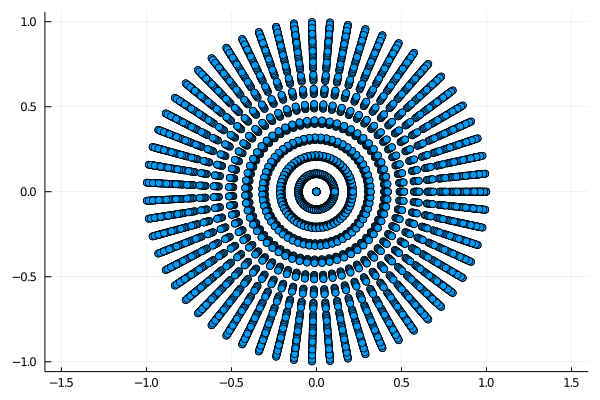

In [343]:
Topografie(i,k) = 0.95 #((k/π)+0.001)*(i/(2*π))
Net_3 = Numerical_Net_3(30,5,Topografie)
scatter(Net_3[1],Net_3[2],leg = false, aspect_ratio=:equal)

In [ ]:
scatter(Net_3[1],Net_3[3],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_3_Seite.png")
scatter(Net_3[1],Net_3[2],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_3_oben.png")
scatter(Net_3[2],Net_3[3],leg = false, aspect_ratio=:equal, fmt = :png)
savefig("Netz_Plots/Netz_3_vorne.png") 

In [ ]:
Gif_2(Net_2,"Netz_Plots/Netz_Erstellung_gif/Netz_2")